In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
df=pd.read_csv("insurance.csv")
# df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 45.1MB/s]


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
data=df.copy()

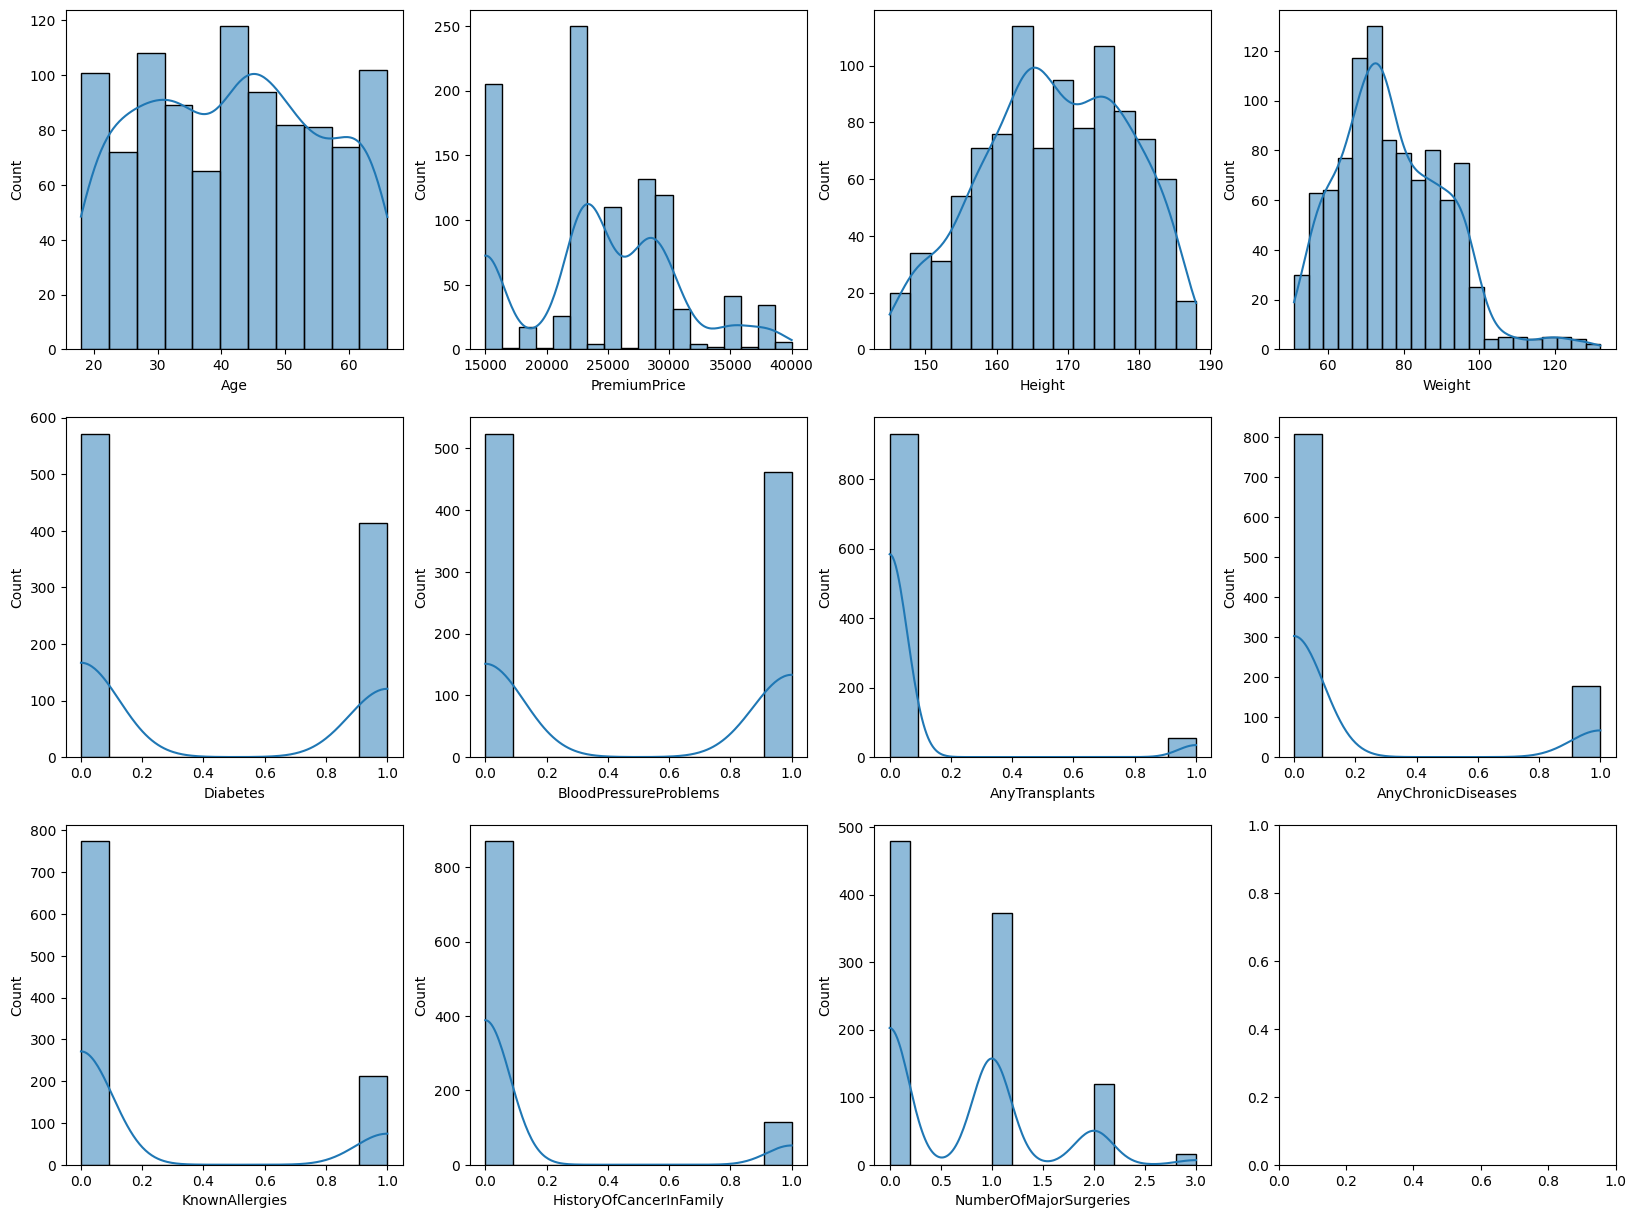

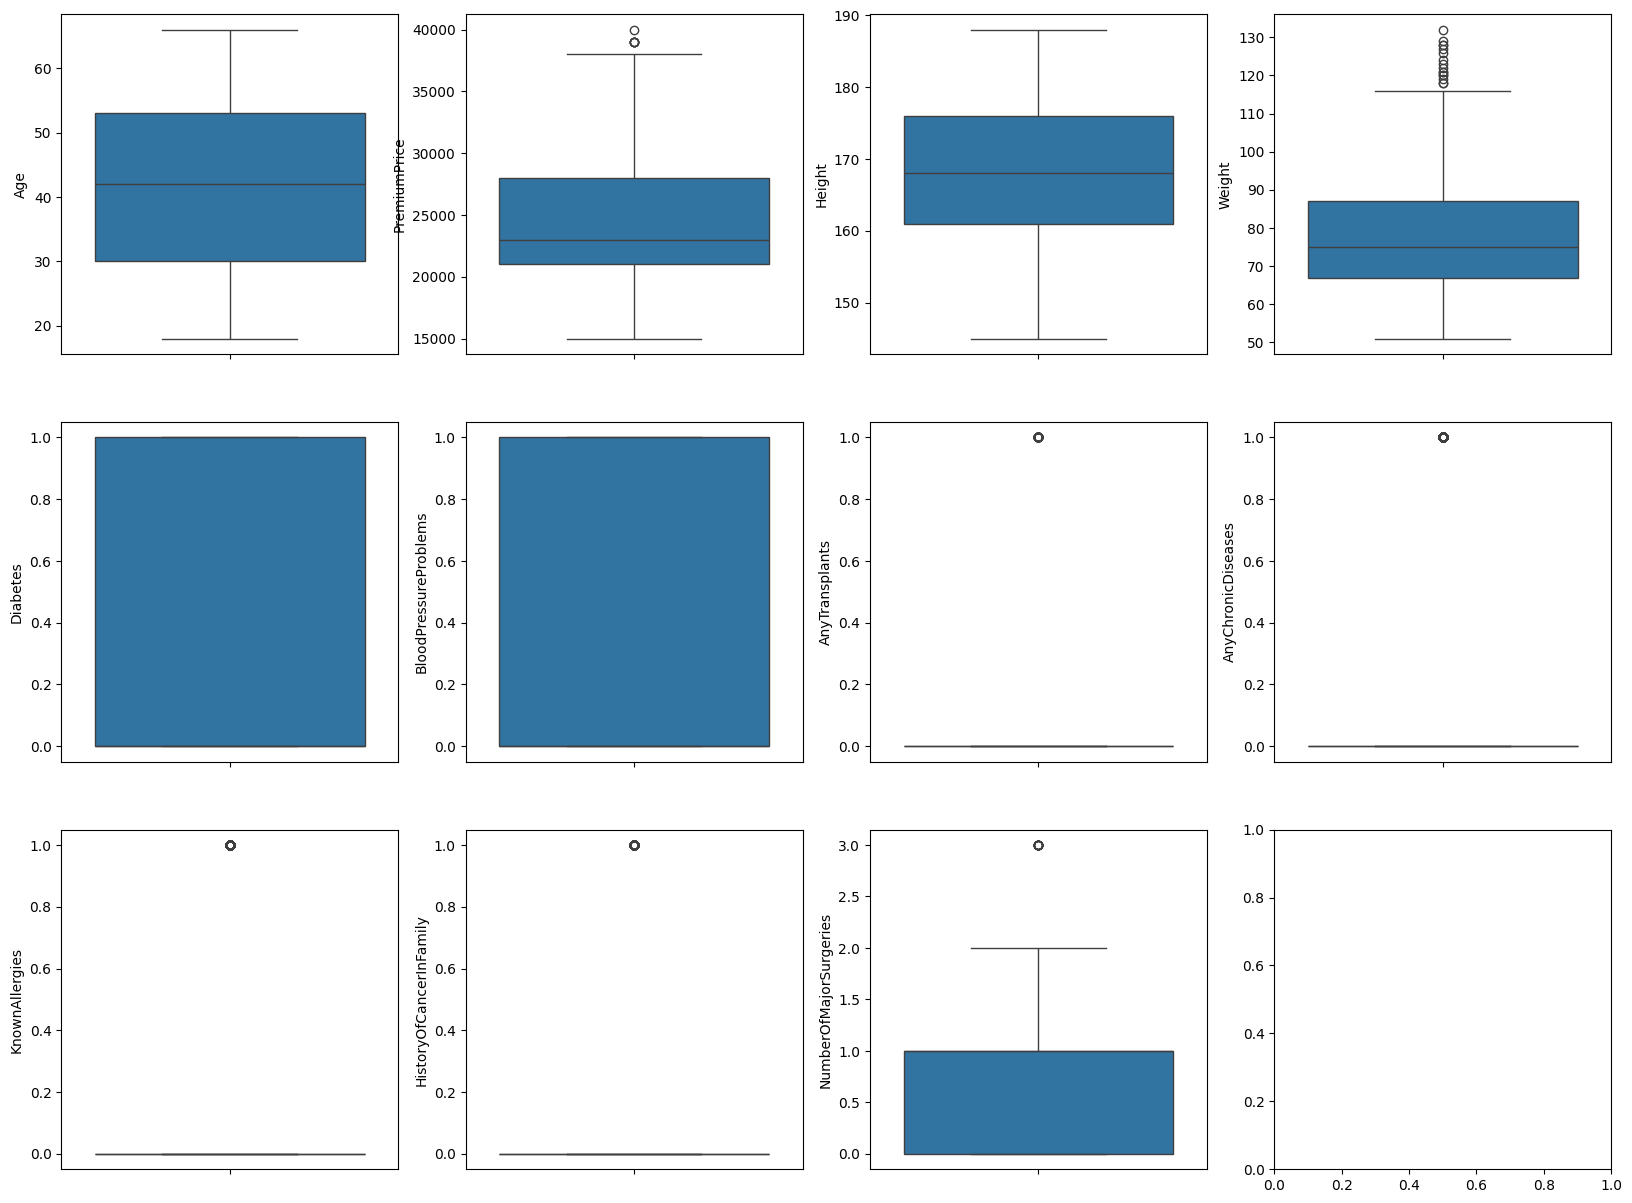

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
sns.histplot(data['Age'], kde=True, ax=axs[0, 0])
sns.histplot(data['PremiumPrice'], kde=True, ax=axs[0, 1])
sns.histplot(data['Height'], kde=True, ax=axs[0, 2])
sns.histplot(data['Weight'], kde=True, ax=axs[0, 3])
sns.histplot(data['Diabetes'], kde=True, ax=axs[1, 0])
sns.histplot(data['BloodPressureProblems'], kde=True, ax=axs[1, 1])
sns.histplot(data['AnyTransplants'], kde=True, ax=axs[1, 2])
sns.histplot(data['AnyChronicDiseases'], kde=True, ax=axs[1, 3])
sns.histplot(data['KnownAllergies'], kde=True, ax=axs[2, 0])
sns.histplot(data['HistoryOfCancerInFamily'], kde=True, ax=axs[2, 1])
sns.histplot(data['NumberOfMajorSurgeries'], kde=True, ax=axs[2, 2])
plt.show()

# Boxplots for outlier detection
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
sns.boxplot(y=data['Age'], ax=axs[0, 0])
sns.boxplot(y=data['PremiumPrice'], ax=axs[0, 1])
sns.boxplot(y=data['Height'], ax=axs[0, 2])
sns.boxplot(y=data['Weight'], ax=axs[0, 3])
sns.boxplot(y=data['Diabetes'], ax=axs[1, 0])
sns.boxplot(y=data['BloodPressureProblems'], ax=axs[1, 1])
sns.boxplot(y=data['AnyTransplants'], ax=axs[1, 2])
sns.boxplot(y=data['AnyChronicDiseases'], ax=axs[1, 3])
sns.boxplot(y=data['KnownAllergies'], ax=axs[2, 0])
sns.boxplot(y=data['HistoryOfCancerInFamily'], ax=axs[2, 1])
sns.boxplot(y=data['NumberOfMajorSurgeries'], ax=axs[2, 2])
plt.show()


**Correlation Analysis**

In [ ]:
data["BMI"] = data["Weight"] / (data["Height"] / 100) ** 2


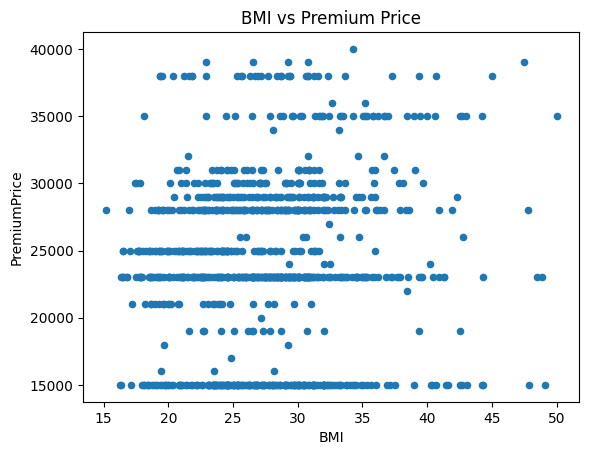

In [ ]:
import matplotlib.pyplot as plt

# ... (your data and DataFrame creation)

data[['BMI', 'PremiumPrice']].plot(kind='scatter', x='BMI', y='PremiumPrice', title='BMI vs Premium Price')
plt.show()


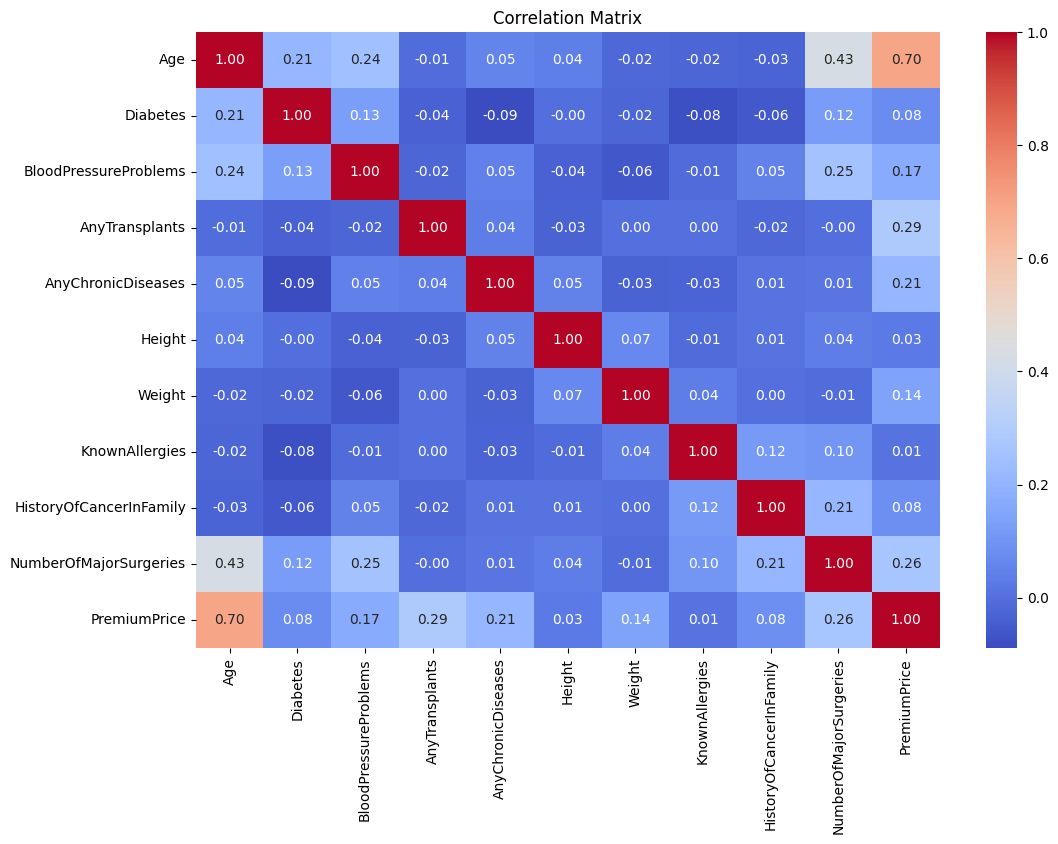

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Hypothesis Testing**

**Hypothesis 1: Are premium costs significantly higher for diabetics compared to non-diabetics?

Null Hypothesis (H₀): There is no significant difference in premium costs between diabetics and non-diabetics.

Alternative Hypothesis (H₁): Premium costs are significantly higher for diabetics compared to non-diabetics**

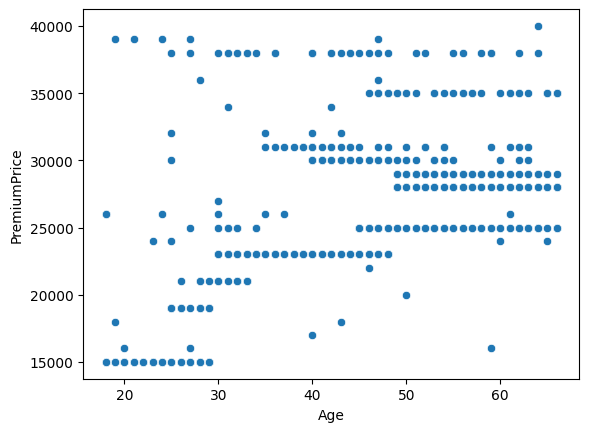

In [ ]:
sns.scatterplot(data=df, x='Age', y='PremiumPrice')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Group data by diabetes status
diabetics = data[data['Diabetes'] == 1]['PremiumPrice']
non_diabetics = data[data['Diabetes'] == 0]['PremiumPrice']

# Perform t-test
t_stat, p_value = ttest_ind(diabetics, non_diabetics)
alpha = 0.05

# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in premium costs between diabetics and non-diabetics.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in premium costs between diabetics and non-diabetics.")


Hypothesis 2: Does the presence of chronic diseases lead to higher insurance premiums?

Null Hypothesis (H₀): The presence of chronic diseases does not lead to higher insurance premiums.

Alternative Hypothesis (H₁): The presence of chronic diseases leads to higher insurance premiums.

In [ ]:
# Group data by chronic disease status
chronic_disease = data[data['AnyChronicDiseases'] == 1]['PremiumPrice']
no_chronic_disease = data[data['AnyChronicDiseases'] == 0]['PremiumPrice']

# Perform t-test
t_stat, p_value = ttest_ind(chronic_disease, no_chronic_disease)
alpha = 0.05

# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis. The presence of chronic diseases leads to higher insurance premiums.")
else:
    print("Fail to reject the null hypothesis. The presence of chronic diseases does not lead to higher insurance premiums.")


**Hypothesis 3: Is there a significant difference in premium costs based on the number of major surgeries a person has had?

Null Hypothesis (H₀): There is no significant difference in premium costs based on the number of major surgeries a person has had.

Alternative Hypothesis (H₁): There is a significant difference in premium costs based on the number of major surgeries a person has had**

In [ ]:
from scipy.stats import f_oneway

# Group data by number of major surgeries
surgery_groups = [data[data['NumberOfMajorSurgeries'] == i]['PremiumPrice'] for i in data['NumberOfMajorSurgeries'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*surgery_groups)
alpha = 0.05

# Print results
print(f"F-statistic: {f_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in premium costs based on the number of major surgeries a person has had.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in premium costs based on the number of major surgeries a person has had.")


**Distribution of data**

In [ ]:
categorical_columns = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
    'NumberOfMajorSurgeries'
]

for col in categorical_columns:
    print(f"Frequency counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Frequency counts for Diabetes:
Diabetes
0    572
1    414
Name: count, dtype: int64


Frequency counts for BloodPressureProblems:
BloodPressureProblems
0    524
1    462
Name: count, dtype: int64


Frequency counts for AnyTransplants:
AnyTransplants
0    931
1     55
Name: count, dtype: int64


Frequency counts for AnyChronicDiseases:
AnyChronicDiseases
0    808
1    178
Name: count, dtype: int64


Frequency counts for KnownAllergies:
KnownAllergies
0    774
1    212
Name: count, dtype: int64


Frequency counts for HistoryOfCancerInFamily:
HistoryOfCancerInFamily
0    870
1    116
Name: count, dtype: int64


Frequency counts for NumberOfMajorSurgeries:
NumberOfMajorSurgeries
0    479
1    372
2    119
3     16
Name: count, dtype: int64




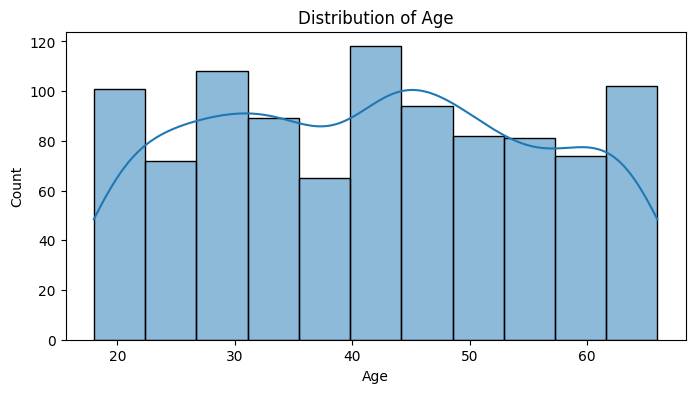

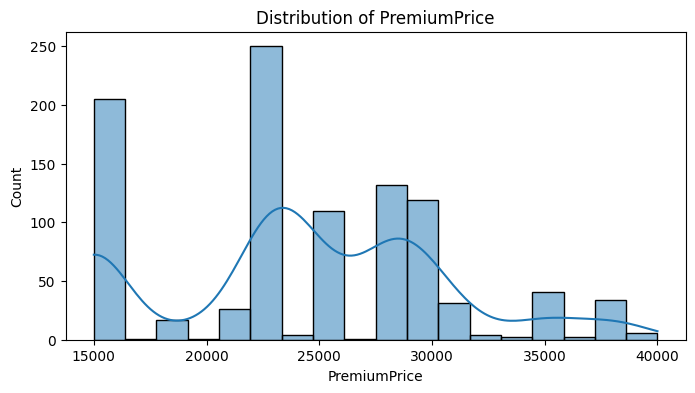

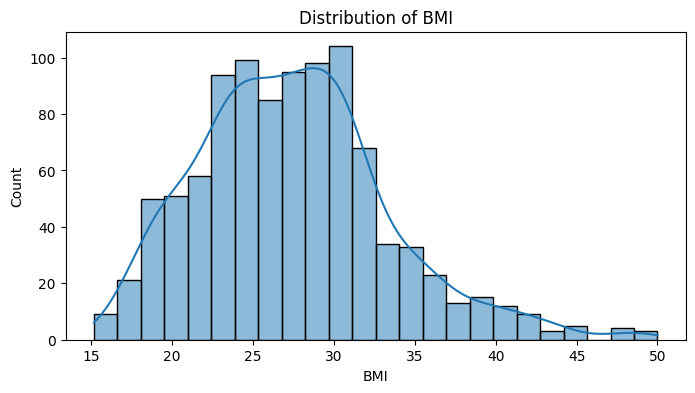

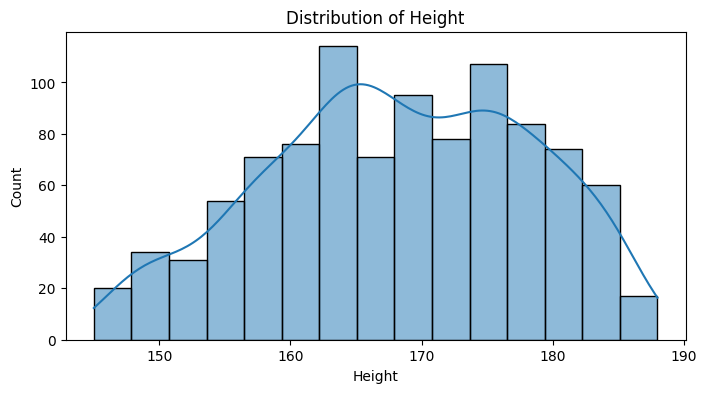

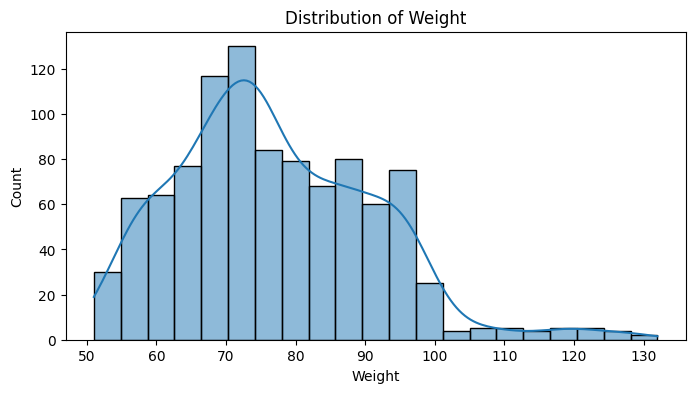

In [ ]:
continuous_columns = ['Age', 'PremiumPrice', 'BMI', 'Height', 'Weight']

# Visualizing with histograms
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


#Modeling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming X is your feature matrix and y is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R-squared on training data:", r2_train)
print("R-squared on testing data:", r2_test)


R-squared on training data: 0.6219256563245066
R-squared on testing data: 0.7133944270278739


In [ ]:
machine=df.copy()

In [ ]:
# Define features and target variable
X = machine.drop(columns=["PremiumPrice"])  # Add more features if needed
y = machine['PremiumPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 12221661.705858212
R^2 Score: 0.7133944270278739


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)


    VIF Factor                 features
0    13.116978                      Age
1     1.857660                 Diabetes
2     2.086127    BloodPressureProblems
3     1.064632           AnyTransplants
4     1.246185       AnyChronicDiseases
5    41.096981                   Height
6   127.346669                   Weight
7     1.317276           KnownAllergies
8     1.223853  HistoryOfCancerInFamily
9     2.438948   NumberOfMajorSurgeries
10   76.011617                      BMI


**testing**

**model encoding**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb







# Define a grid of hyperparameters for each model
param_grid_lr = {'fit_intercept': [True, False]}
param_grid_ridge = {'alpha': [0.001, 0.01,0.5, 1, 10]}
param_grid_lasso = {'alpha': [0.001, 0.01,0.5, 1, 10]}
param_grid_rf = {
    'n_estimators': [20,50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_gb = {
    'n_estimators': [20,50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5]
}
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5]
}

# Initialize models
models = {
    'Linear Regression': (LinearRegression(), param_grid_lr),
    'Ridge Regression': (Ridge(), param_grid_ridge),
    'Lasso Regression': (Lasso(), param_grid_lasso),
    'Random Forest': (RandomForestRegressor(), param_grid_rf),
    'Gradient Boosting': (GradientBoostingRegressor(), param_grid_gb),
    'XGBoost': (xgb.XGBRegressor(), param_grid_xgb)
}

best_models = {}
best_scores = {}

# Perform GridSearchCV for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    best_scores[model_name] = {'MSE': mse, 'R2': r2}

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Test MSE: {mse}")
    print(f"{model_name} - Test R2: {r2}")
    print()

# Summary of best models and their scores
for model_name, score in best_scores.items():
    print(f"{model_name} - MSE: {score['MSE']}, R2: {score['R2']}")


Linear Regression - Best Parameters: {'fit_intercept': True}
Linear Regression - Test MSE: 12845090.225016784
Linear Regression - Test R2: 0.7070252058282107

Ridge Regression - Best Parameters: {'alpha': 1}
Ridge Regression - Test MSE: 12940862.061071178
Ridge Regression - Test R2: 0.7048408121444012

Lasso Regression - Best Parameters: {'alpha': 10}
Lasso Regression - Test MSE: 12986485.925293034
Lasso Regression - Test R2: 0.7038002089259289

Random Forest - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - Test MSE: 5427197.620910743
Random Forest - Test R2: 0.8762147966217285

Gradient Boosting - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting - Test MSE: 6674162.214814086
Gradient Boosting - Test R2: 0.8477736421542547

XGBoost - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
XGBoost - Test MSE: 6751495.837402695
XGBoost - Test R2: 0.846

**model evaluation and validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Function to evaluate the model with cross-validation
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean(), rmse_scores.std()

# Evaluate each model
for model_name, model in best_models.items():
    mean_rmse, std_rmse = evaluate_model(model, X_train, y_train)
    print(f"{model_name} - Cross-Validation RMSE: {mean_rmse:.2f} ± {std_rmse:.2f}")


Linear Regression - Cross-Validation RMSE: 3855.44 ± 338.73
Ridge Regression - Cross-Validation RMSE: 3854.24 ± 340.71
Lasso Regression - Cross-Validation RMSE: 3853.08 ± 343.63
Random Forest - Cross-Validation RMSE: 3022.29 ± 396.07
Gradient Boosting - Cross-Validation RMSE: 3257.59 ± 505.16
XGBoost - Cross-Validation RMSE: 3192.62 ± 496.75


**Interpretability and Explainability**

In [ ]:
!pip install shap

Best Model: Random Forest
R² Score: 0.8762147966217285


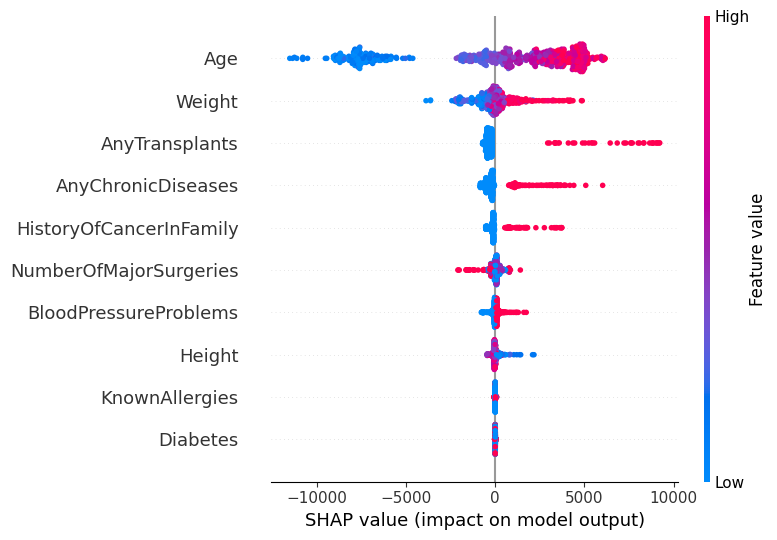

In [ ]:

import shap

# Function to plot SHAP values for a given model
def plot_shap_values(model, X, feature_names):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, feature_names=feature_names)

# Retrieve and print the best model details
best_model_name = max(best_scores, key=lambda k: best_scores[k]['R2'])
best_model = best_models[best_model_name]
best_r2_score = best_scores[best_model_name]['R2']

print(f"Best Model: {best_model_name}")
print(f"R² Score: {best_r2_score}")

# Plot SHAP values (note: this may take some time for complex models)
plot_shap_values(best_model, X_train, df.drop('PremiumPrice', axis=1).columns)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle


# Define features and target variable
X = df.drop(columns="PremiumPrice")  # Add more features if needed
y = df['PremiumPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regression model
rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf= 2, min_samples_split= 10, n_estimators= 200, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate and print evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R^2 Score (Random Forest): {r2_rf}")




Mean Squared Error (Random Forest): 4086367.9824803034
R^2 Score (Random Forest): 0.9041721277203788
